In [1]:
# For reletive imports
import sys
sys.path.append('../../neural-chess')

from data.loader import *

In [2]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [3]:
# Various imports
import numpy as np

from tensorflow import keras
from keras import layers

In [4]:
TRAIN_AUTOENCODER = 0 
TRAIN_NET = 1

TOTAL_AE = 250000
TOTAL_MLP = 750000

BS_AE = 20
BS_MLP = 50
EPOCHS_AE = 50 
EPOCHS_MLP = 201 
RATE_AE = 0.005
DECAY_AE = 0.98
RATE_MLP = 0.005
DECAY_MLP = 0.98

BIAS = 0.15

N_INPUT = 769 
ENCODING_1 = 600 
ENCODING_2 = 400 
ENCODING_3 = 200
ENCODING_4 = 100

HIDDEN_1 = 200
HIDDEN_2 = 400 
HIDDEN_3 = 200
HIDDEN_4 = 100 
N_OUT = 2

VOLUME_SIZE = 25000

export_path = 'net/exports'

#Get the data from the game files
validation_test, validation_test_l = getTest(N_INPUT, 40, 44)
whiteWins, blackWins = getTrain(N_INPUT, TOTAL_MLP, VOLUME_SIZE)

Loading batch number 0
Loading batch number 1
Loading batch number 2
Loading batch number 3
Loading batch number 4
Loading batch number 5
Loading batch number 6
Loading batch number 7
Loading batch number 8
Loading batch number 9
Loading batch number 10
Loading batch number 11
Loading batch number 12
Loading batch number 13
Loading batch number 14
Loading batch number 15
Loading batch number 16
Loading batch number 17
Loading batch number 18
Loading batch number 19
Loading batch number 20
Loading batch number 21
Loading batch number 22
Loading batch number 23
Loading batch number 24
Loading batch number 25
Loading batch number 26
Loading batch number 27
Loading batch number 28
Loading batch number 29


In [5]:
# Creating the siamese autoencoders. SHAPE IS OFF, only position and player to move, not other data
input_shape = blackWins[0].shape
print("Input Shape:", input_shape)

# Layer 1
Pos2Vec = keras.Sequential([
    # layers.Dense(769, activation='relu', input_shape=input_shape),
    layers.Dense(600, activation='relu', input_shape=input_shape),
    layers.Dense(769, activation='sigmoid'),
])

Input Shape: (769,)
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-20 18:56:46.597682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-20 18:56:46.597850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
print("Defining Learning Rate")
sample_size = 10000
# Defining a decaying learning rate
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps= sample_size / 200,
    decay_rate=0.98,
    name=None)
    
# Compiling model
print("Compiling")
Pos2Vec.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss='mean_squared_error',
)

Defining Learning Rate
Compiling


In [7]:
# whiteWins, blackWins
print("Generating random train")
sample_size = 10000#1000000
test_size= 1000#1000
white_sample = whiteWins[np.random.randint(whiteWins.shape[0], size=sample_size), :]
black_sample = blackWins[np.random.randint(blackWins.shape[0], size=sample_size), :]

white_test = whiteWins[np.random.randint(whiteWins.shape[0], size=test_size), :]
black_test = blackWins[np.random.randint(blackWins.shape[0], size=test_size), :]

autoencoder_train = np.concatenate([white_sample, black_sample])
autoencoder_test = np.concatenate([white_test, black_test])

early_stopping = keras.callbacks.EarlyStopping(
    patience=500,
    min_delta=0.0001,
    restore_best_weights=True,
)

print("Training")
history = Pos2Vec.fit(
    autoencoder_train, autoencoder_train,
    validation_data=(autoencoder_test, autoencoder_test),
    batch_size=None,
    epochs=10, #200
    callbacks=[early_stopping],
    verbose=1,
)

Generating random train
Training
Epoch 1/10


2022-03-20 18:56:46.981950: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-20 18:56:47.094573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 3s 4ms/step - loss: 0.2504 - val_loss: 0.2498
Epoch 2/10
  1/625 [..............................] - ETA: 2s - loss: 0.2500

2022-03-20 18:56:49.452841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 2s 4ms/step - loss: 0.2493 - val_loss: 0.2488
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2484 - val_loss: 0.2480
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2477 - val_loss: 0.2474
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2472 - val_loss: 0.2470
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2468 - val_loss: 0.2466
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2465 - val_loss: 0.2463
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2462 - val_loss: 0.2461
Epoch 9/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2460 - val_loss: 0.2459
Epoch 10/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2459 - val_loss: 0.2458


In [8]:
# Training the 400 node layer
layer_1 = Pos2Vec.layers[0] # 769 - 600nodes
layer_2 = Pos2Vec.layers[1] # 600 - 769nodes

layer_1.trainable = False
layer_2.trainable = False

Pos2Vec_2 = keras.Sequential([
    # layers.Dense(769, activation='relu', input_shape=input_shape),
    layer_1,
    layers.Dense(400, activation='relu'),
    layers.Dense(600, activation='relu'),
    layer_2,
])

In [9]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    0.005,
    decay_steps=100000,
    decay_rate=0.98)

decay_optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [10]:
# Compiling model
Pos2Vec_2.compile(
    optimizer=decay_optimizer,
    loss='mean_squared_error',
)

In [11]:
print("Training")
history = Pos2Vec_2.fit(
    autoencoder_train, autoencoder_train,
    validation_data=(autoencoder_test, autoencoder_test),
    batch_size=None,
    epochs=10, #200
    callbacks=[early_stopping],
    verbose=1,
)

Training
Epoch 1/10
 28/625 [>.............................] - ETA: 2s - loss: 0.2481 

2022-03-20 18:57:11.050469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


617/625 [============================>.] - ETA: 0s - loss: 0.2480

2022-03-20 18:57:13.585828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 3s 4ms/step - loss: 0.2480 - val_loss: 0.2478
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2477 - val_loss: 0.2476
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2474 - val_loss: 0.2473
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2471 - val_loss: 0.2469
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2468 - val_loss: 0.2466
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2464 - val_loss: 0.2463
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2461 - val_loss: 0.2459
Epoch 8/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2457 - val_loss: 0.2455
Epoch 9/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2453 - val_loss: 0.2451
Epoch 10/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2449 - val_loss: 0.2447


In [12]:
# Training the 400 node layer
layer_3 = Pos2Vec_2.layers[1] # 600 - 400nodes
layer_4 = Pos2Vec_2.layers[2] # 400 - 600nodes

layer_3.trainable = False
layer_4.trainable = False

Pos2Vec_3 = keras.Sequential([
    # layers.Dense(769, activation='relu', input_shape=input_shape),
    layer_1,
    layer_3,
    layers.Dense(200, activation='relu'),
    layers.Dense(400, activation='relu'),
    layer_4,
    layer_2,
])

In [13]:
# Compiling model
Pos2Vec_3.compile(
    optimizer=decay_optimizer,
    loss='mean_squared_error',
)

In [14]:
print("Training")
history = Pos2Vec_3.fit(
    autoencoder_train, autoencoder_train,
    validation_data=(autoencoder_test, autoencoder_test),
    batch_size=None,
    epochs=10, #200
    callbacks=[early_stopping],
    verbose=1,
)

Training
Epoch 1/10
 28/625 [>.............................] - ETA: 2s - loss: 0.2473 

2022-03-20 18:57:38.766425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


616/625 [============================>.] - ETA: 0s - loss: 0.2472

2022-03-20 18:57:41.347932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 3s 4ms/step - loss: 0.2472 - val_loss: 0.2472
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2471 - val_loss: 0.2471
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2470 - val_loss: 0.2470
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2469 - val_loss: 0.2469
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2468 - val_loss: 0.2468
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2467 - val_loss: 0.2467
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2466 - val_loss: 0.2466
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2465 - val_loss: 0.2465
Epoch 9/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2464 - val_loss: 0.2464
Epoch 10/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2463 - val_loss: 0.2462


In [15]:
# Training the 400 node layer
layer_5 = Pos2Vec_3.layers[2] # 400 - 200nodes
layer_6 = Pos2Vec_3.layers[3] # 200 - 400nodes

layer_5.trainable = False
layer_6.trainable = False

Pos2Vec_4 = keras.Sequential([
    # layers.Dense(769, activation='relu', input_shape=input_shape),
    layer_1,
    layer_3,
    layer_5,
    layers.Dense(100, activation='relu'),
    layers.Dense(200, activation='relu'),
    layer_6,
    layer_4,
    layer_2,
])

In [16]:

# Compiling model
Pos2Vec_4.compile(
    optimizer=decay_optimizer,
    loss='mean_squared_error',
)

In [17]:
print("Training")
history = Pos2Vec_4.fit(
    autoencoder_train, autoencoder_train,
    validation_data=(autoencoder_test, autoencoder_test),
    batch_size=None,
    epochs=10, #200
    callbacks=[early_stopping],
    verbose=1,
)

Training
Epoch 1/10
 25/625 [>.............................] - ETA: 2s - loss: 0.2474 

2022-03-20 18:58:06.554640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - ETA: 0s - loss: 0.2474

2022-03-20 18:58:09.622236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 3s 5ms/step - loss: 0.2474 - val_loss: 0.2474
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2474 - val_loss: 0.2474
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2474 - val_loss: 0.2473
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2473 - val_loss: 0.2473
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2473 - val_loss: 0.2473
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2473 - val_loss: 0.2472
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2472 - val_loss: 0.2472
Epoch 8/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2472 - val_loss: 0.2472
Epoch 9/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2471 - val_loss: 0.2471
Epoch 10/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2471 - val_loss: 0.2471


In [18]:
# Training the 400 node layer
layer_7 = Pos2Vec_4.layers[3] # 400 - 200nodes
layer_8 = Pos2Vec_4.layers[4] # 200 - 400nodes

layer_7.trainable = False
layer_8.trainable = False

Pos2Vec_A = keras.Sequential([
    # layers.Dense(769, activation='relu', input_shape=input_shape),
    layer_1,
    layer_3,
    layer_5,
    layer_7,
])

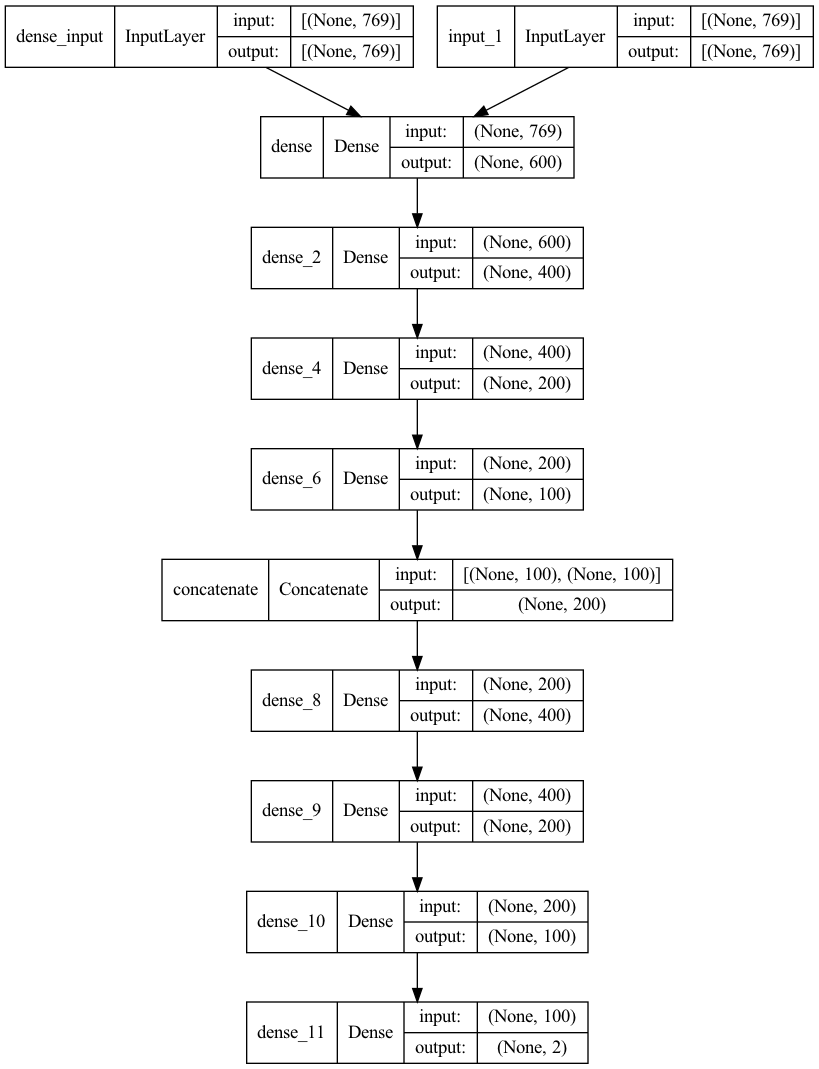

In [19]:
import pydotplus
from keras.utils.vis_utils import plot_model
from keras.layers import concatenate

pydot = pydotplus

# Duplicating siamese Pos2Vec with tied weights
la0, la1, la2, la3 = Pos2Vec_A.layers
Pos2Vec_B_in = keras.layers.Input(shape=(769,))
lc0 = la0(Pos2Vec_B_in)
lc1 = la1(lc0)
lc2 = la2(lc1)
lc2 = la3(lc2)

Pos2Vec_B = keras.Model(inputs=Pos2Vec_B_in, outputs=lc2)

# Creating DeepChess layers to compare pos2vec
twin_p2v_in = concatenate([Pos2Vec_A.output, Pos2Vec_B.output])
l0 = layers.Dense(400, activation="relu")(twin_p2v_in)
l1 = layers.Dense(200, activation="relu")(l0)
l2 = layers.Dense(100, activation="relu")(l1)
deepchess_out = layers.Dense(2, activation="softmax")(l2)

DeepChess = keras.Model(
    inputs=[Pos2Vec_A.input, Pos2Vec_B.input], 
    outputs=[deepchess_out])

plot_model(DeepChess,
            show_shapes=True)

In [83]:
# whiteWins, blackWins
print("Generating random sample")
train_size = 10000#1000000

## Generating training data
# sampling white wins and losses (black wins)
white_w_train = whiteWins[np.random.randint(whiteWins.shape[0], size=train_size), :]
white_l_train = blackWins[np.random.randint(blackWins.shape[0], size=train_size), :]

# Creating (W, L) or (L, W) pairs
DeepChess_in_A = np.concatenate((white_w_train[:train_size // 2], white_l_train[:train_size // 2]))
DeepChess_in_B = np.concatenate((white_l_train[train_size // 2:], white_w_train[train_size // 2:]))

# Creating (1, 0) or (0, 1) pairs corresponding to input
DeepChess_out = np.array([(1,0)] * (train_size // 2) + 
                            [(0,1)] * (train_size // 2))

Generating random sample


In [84]:
lr_schedule2 = keras.optimizers.schedules.ExponentialDecay(
    0.01,
    decay_steps=100,
    decay_rate=0.99)

decay_optimizer2 = keras.optimizers.SGD(learning_rate=lr_schedule2)

# Compiling model
DeepChess.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
)

In [90]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=500,
    min_delta=0.0001,
    restore_best_weights=True,
)

print("Training")
history = DeepChess.fit(
    x=[DeepChess_in_A, DeepChess_in_B], y=DeepChess_out,
    validation_split=0.1,
    batch_size=None,
    epochs=100, #1000
    shuffle=True,
    callbacks=[early_stopping],
    use_multiprocessing=True,
    verbose=1,
)

Training
Epoch 1/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1390 - val_loss: 0.3578
Epoch 2/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1343 - val_loss: 0.3076
Epoch 3/100
282/282 [==============================] - 3s 9ms/step - loss: 0.1292 - val_loss: 0.3670
Epoch 4/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1258 - val_loss: 0.3640
Epoch 5/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1201 - val_loss: 0.4111
Epoch 6/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1144 - val_loss: 0.4422
Epoch 7/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1106 - val_loss: 0.4204
Epoch 8/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1073 - val_loss: 0.4959
Epoch 9/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1014 - val_loss: 0.4258
Epoch 10/100
282/282 [==============================] - 2s 8ms/step - loss: 0.0997

In [92]:
DeepChess([blackWins[0:10], whiteWins[0:10]])

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.14632747, 0.89238447],
       [0.        , 1.0141386 ],
       [0.31277353, 0.7474295 ],
       [0.        , 0.97547734],
       [0.        , 0.8692372 ],
       [0.27062958, 0.77073604],
       [0.56747204, 0.44557148],
       [1.0372422 , 0.        ],
       [0.9562915 , 0.        ],
       [0.        , 1.0283304 ]], dtype=float32)>

In [93]:
DeepChess([whiteWins[0:10], blackWins[0:10]])

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.        , 0.93043494],
       [1.0251346 , 0.        ],
       [1.0775771 , 0.        ],
       [0.9528956 , 0.        ],
       [0.19369021, 0.78351784],
       [0.8084347 , 0.08368978],
       [0.9877612 , 0.        ],
       [0.09077638, 0.8926259 ],
       [1.0366955 , 0.        ],
       [0.9486895 , 0.        ]], dtype=float32)>

In [95]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [94]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'accuracy'

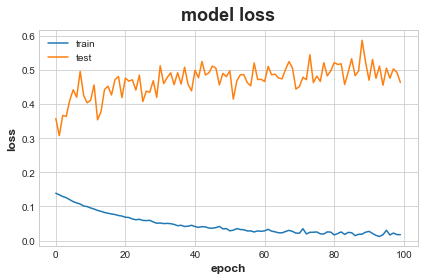

In [96]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()